In [1]:
import pandas as pd 
from datetime import datetime

In [49]:
deplacement = pd.read_csv('data/2022-avril-data.csv')
deplacement

,start_date,emplacement_pk_start,end_date,emplacement_pk_end,duration_sec,is_member
0,2022-04-23 15:32:23.617,9,2022-04-23 16:01:02.168,185,1718,1
1,2022-04-30 17:17:50.467,9,2022-04-30 17:33:29.387,75,938,0
2,2022-04-30 13:34:04.193,9,2022-04-30 14:33:42.824,532,3578,1
3,2022-04-26 12:09:08.792,9,2022-04-26 12:12:12.454,780,183,1
4,2022-04-30 13:33:26.090,9,2022-04-30 14:34:43.816,533,3677,1
...,...,...,...,...,...,...
344398,2022-04-29 19:25:22.177,1177,2022-04-29 19:30:26.711,537,304,1
344399,2022-04-30 02:58:39.189,1177,2022-04-30 03:21:06.081,1123,1346,1
344400,2022-04-30 02:58:09.486,1177,2022-04-30 03:13:32.217,548,922,1
344401,2022-04-30 17:31:36.055,1177,2022-04-30 17:45:07.904,145,811,0


In [60]:
deplacement.start_date = deplacement.start_date.apply(lambda x: x.split(" ")[0])
deplacement


,start_date,emplacement_pk_start,end_date,emplacement_pk_end,duration_sec,is_member
0,2022-04-23,9,2022-04-23 16:01:02.168,185,1718,1
1,2022-04-30,9,2022-04-30 17:33:29.387,75,938,0
2,2022-04-30,9,2022-04-30 14:33:42.824,532,3578,1
3,2022-04-26,9,2022-04-26 12:12:12.454,780,183,1
4,2022-04-30,9,2022-04-30 14:34:43.816,533,3677,1
...,...,...,...,...,...,...
344398,2022-04-29,1177,2022-04-29 19:30:26.711,537,304,1
344399,2022-04-30,1177,2022-04-30 03:21:06.081,1123,1346,1
344400,2022-04-30,1177,2022-04-30 03:13:32.217,548,922,1
344401,2022-04-30,1177,2022-04-30 17:45:07.904,145,811,0


In [74]:
deplacement_par_jour = deplacement.groupby("start_date").count()
deplacement_par_jour.sort_values(by=["start_date"], inplace=True)
deplacement_par_jour.drop(deplacement_par_jour.columns.difference(["start_date","emplacement_pk_start"]),1,inplace=True)
deplacement_par_jour.reset_index(inplace=True)

/var/folders/26/8fmjr0hs0h14840tjltjvpjw0000gn/T/ipykernel_1984/3150789083.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  deplacement_par_jour.drop(deplacement_par_jour.columns.difference(["start_date","emplacement_pk_start"]),1,inplace=True)


<AxesSubplot:xlabel='start_date'>

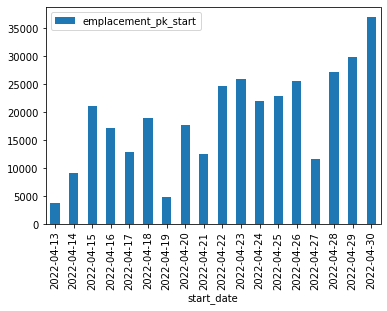

In [75]:
import matplotlib.pyplot as plt 
deplacement_par_jour.plot(x="start_date",y="emplacement_pk_start",kind="bar")

In [85]:
date_debut, date_fin= deplacement_par_jour['start_date'][0],deplacement_par_jour['start_date'][len(deplacement_par_jour)-1]
date_debut, date_fin

('2022-04-13', '2022-04-30')

In [87]:
import requests

r = requests.get('https://api.oikolab.com/weather',
                 params={'param': ['temperature','wind_speed'],
                         'start': date_debut,
                         'end': date_fin,
                         'lat': 43.6529,
                         'lon': -79.3849,
                         'freq':'D',
                         'api-key': '9bcc801713754ea5afb3a7aad60e263f'}
                 )
import json
import pandas as pd

weather_data = json.loads(r.json()['data'])
df = pd.DataFrame(index=pd.to_datetime(weather_data['index'],
                                       unit='s'),
                  data=weather_data['data'],
                  columns=weather_data['columns'])
df

,"coordinates (lat,lon)",model (name),model elevation (surface),utc_offset (hrs),temperature (degC),wind_speed (m/s)
2022-04-13,"(43.6529, -79.3849)",era5,127.15,-5.0,9.81,3.78
2022-04-14,"(43.6529, -79.3849)",era5,127.15,-5.0,10.34,5.12
2022-04-15,"(43.6529, -79.3849)",era5,127.15,-5.0,7.70,7.52
2022-04-16,"(43.6529, -79.3849)",era5,127.15,-5.0,4.50,3.51
2022-04-17,"(43.6529, -79.3849)",era5,127.15,-5.0,2.52,4.15
2022-04-18,"(43.6529, -79.3849)",era5,127.15,-5.0,2.76,4.69
2022-04-19,"(43.6529, -79.3849)",era5,127.15,-5.0,3.11,7.02
2022-04-20,"(43.6529, -79.3849)",era5,127.15,-5.0,4.23,4.97
2022-04-21,"(43.6529, -79.3849)",era5,127.15,-5.0,7.61,5.93
2022-04-22,"(43.6529, -79.3849)",era5,127.15,-5.0,7.15,3.47
